In [1]:
pip install pandas-profiling;

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import pandas_profiling as pf
from sklearn.svm import SVC
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
import category_encoders  as ce 
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
%matplotlib inline


C:\Users\USER\AppData\Local\Temp\ipykernel_13712\2325284538.py:4: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pf


In [3]:
pf.__version__

'3.6.6'

In [4]:
churn = pd.read_csv('Customer-Churn-Records.csv')

In [5]:
churn.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  Complain  Satisfaction Score Card Type  \
0        101348.88       1         1                   2   DIAMOND   
1        112542.58       0         1                   3   DIAMOND   
2        113931.57       1         1                   3   DIAMOND   
3         93826.63       0         0                   5      GOLD   
4         79084.10       0         0                   5      GOLD   

   Point Earned  
0           464  
1           456  
2           377  
3           350  
4           425

In [6]:
churn= churn.rename(columns={'Satisfaction Score': 'SatisfactionScore', 'Card Type': 'CardType', 'Point Earned':'PointEarned'})

In [7]:
churn.shape

(10000, 18)

In [8]:
churn.isnull().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
Complain             0
SatisfactionScore    0
CardType             0
PointEarned          0
dtype: int64

In [9]:
churn.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited      Complain  SatisfactionScore  \
count     10000.000000  10000.000000  10000.000000       10000.000000   
mean     100090.239881      0.203800      0.204400           3.013800   
std       57510.492818      0.402842      0.403283           1.405919   
min          11.580000      0.000000      0.000000           1.000000   
25%       51002.110000      0.000000      0.000000           2.000000   
50%      100193.915000      0.000000      0.000000           3.000000   
75%      149388.247500      0.000000      0.000000           4.000000   
max      199992.480000      1.000000      1.000000           5.000000   

        PointEarned  
count  10000.000000  
mean     606.515100  
std      225.924839  
min      119.000000  
25%      410.000000  
50%      605.000000  
75%      801.000000  
max     1000.000000

In [10]:
pf.ProfileReport(churn)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
churn.dtypes

RowNumber              int64
CustomerId             int64
Surname               object
CreditScore            int64
Geography             object
Gender                object
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Complain               int64
SatisfactionScore      int64
CardType              object
PointEarned            int64
dtype: object

In [12]:
(churn.isnull().sum()/len(churn))

RowNumber            0.0
CustomerId           0.0
Surname              0.0
CreditScore          0.0
Geography            0.0
Gender               0.0
Age                  0.0
Tenure               0.0
Balance              0.0
NumOfProducts        0.0
HasCrCard            0.0
IsActiveMember       0.0
EstimatedSalary      0.0
Exited               0.0
Complain             0.0
SatisfactionScore    0.0
CardType             0.0
PointEarned          0.0
dtype: float64

In [13]:
from sklearn.metrics import confusion_matrix

In [14]:
confusion_matrix(churn.Exited,churn.Complain)

array([[7952,   10],
       [   4, 2034]], dtype=int64)

<AxesSubplot:title={'center':'Variable CardType'}, xlabel='CardType', ylabel='count'>

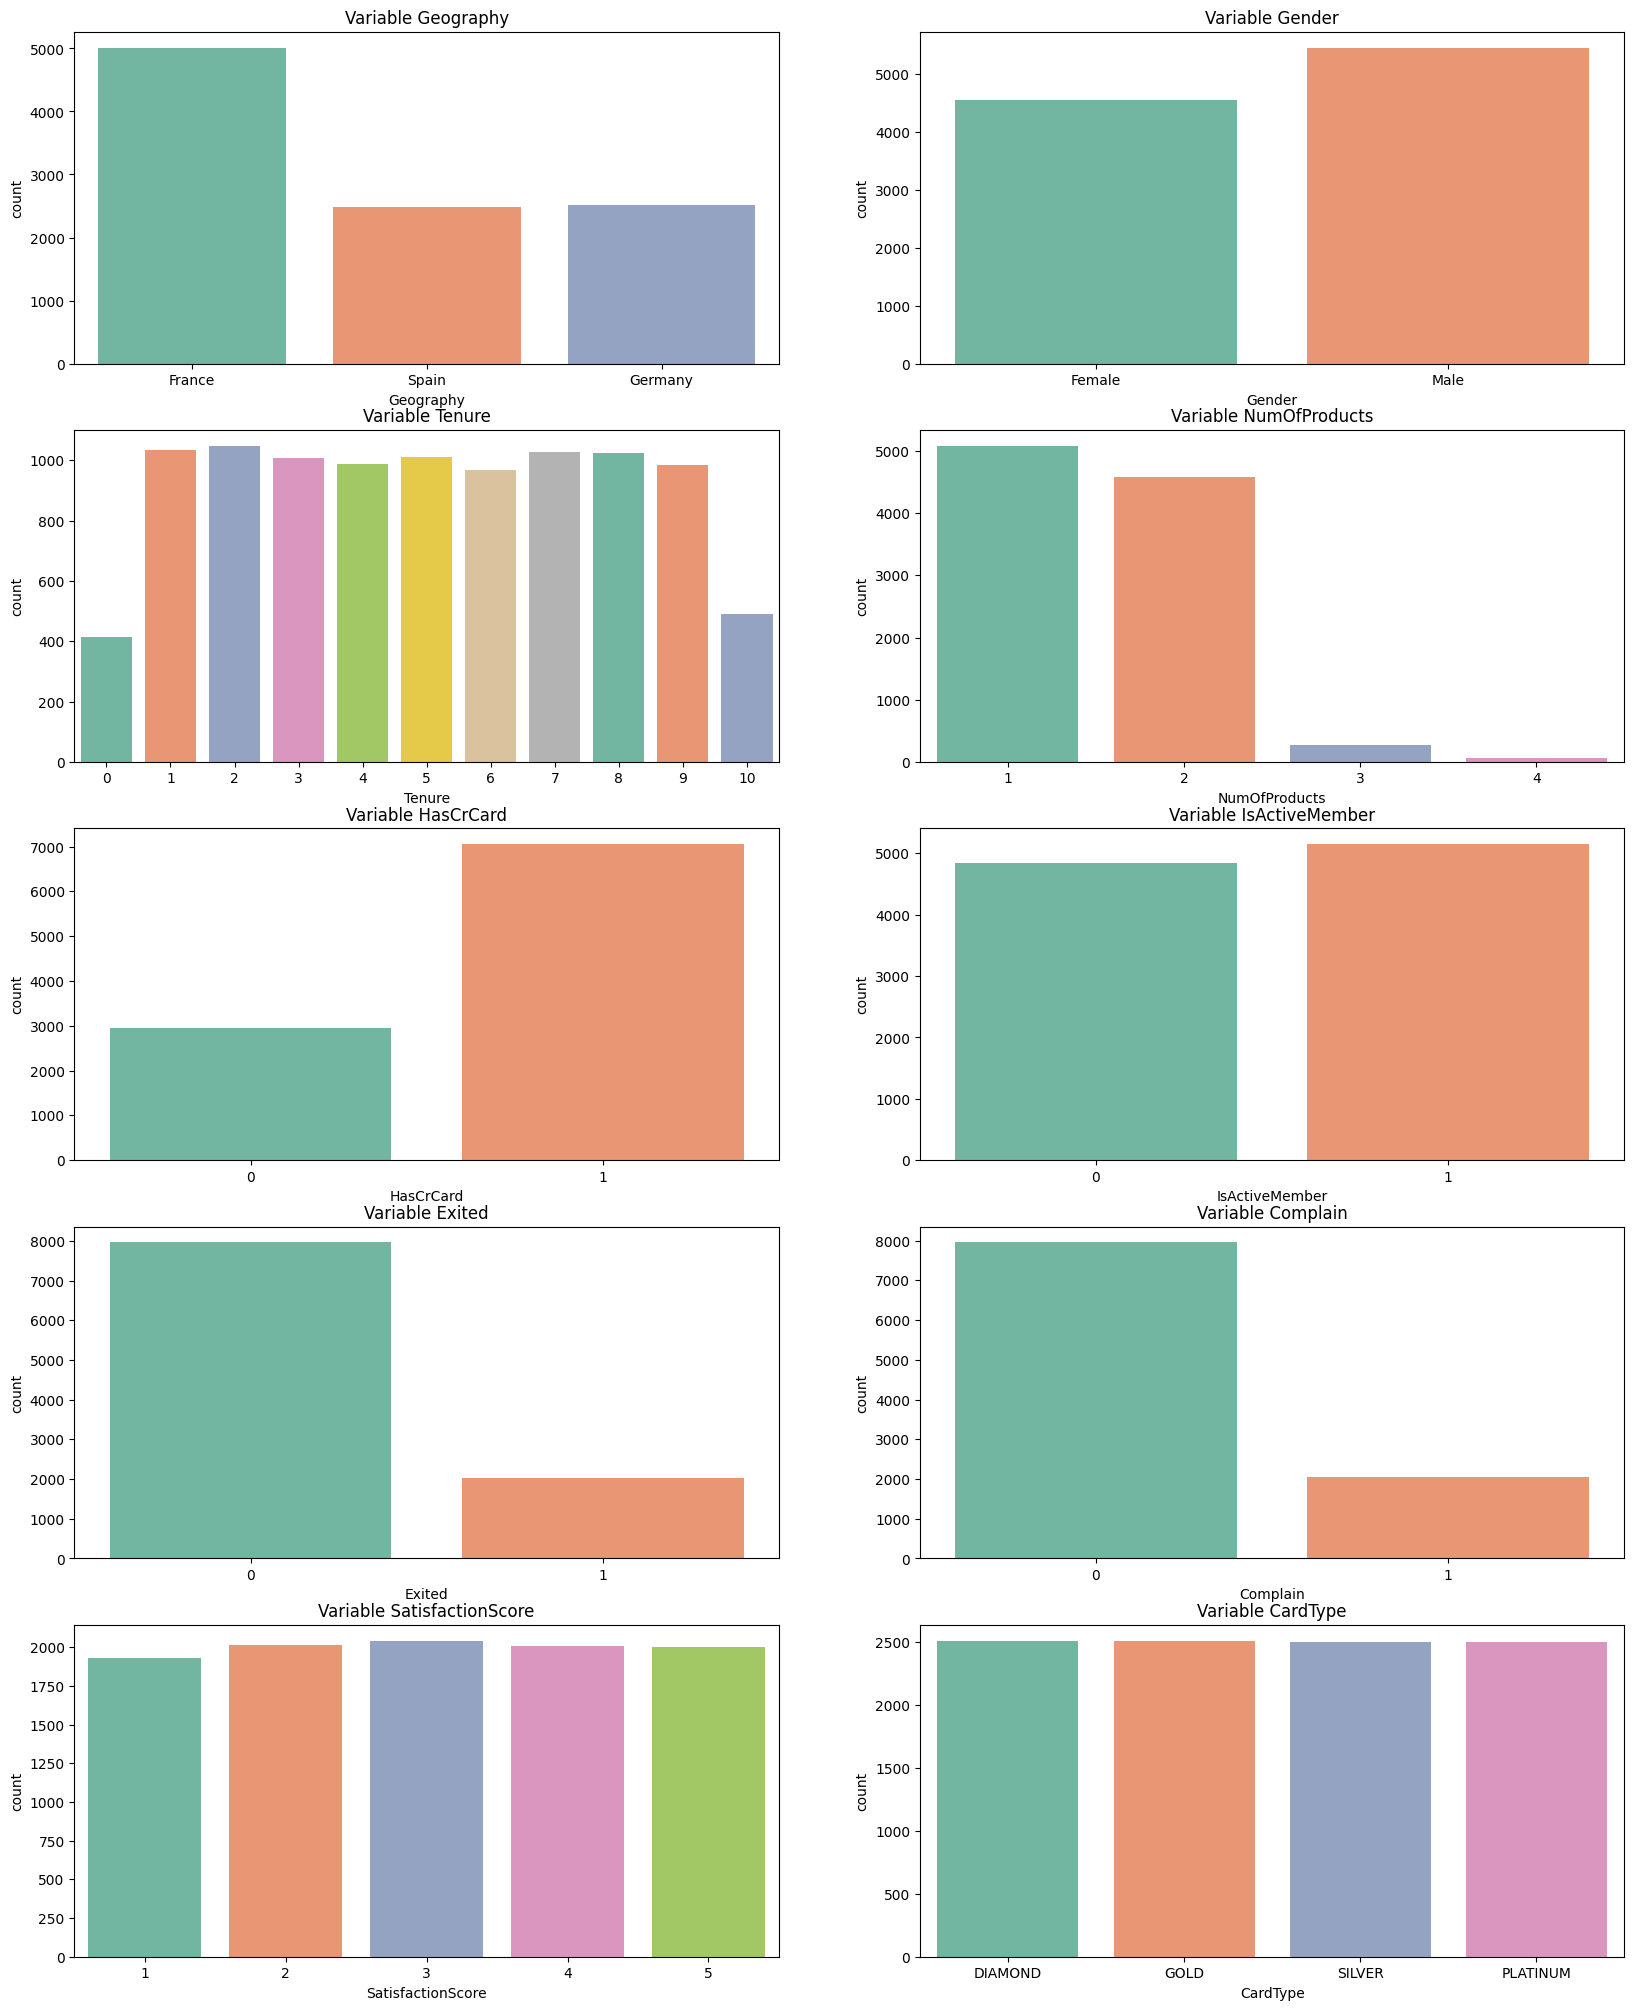

In [15]:
plt.figure(figsize = (20, 25))

plt.subplot(5, 2, 1)
plt.gca().set_title('Variable Geography')
sns.countplot(x = 'Geography', palette = 'Set2', data = churn)

plt.subplot(5, 2, 2)
plt.gca().set_title('Variable Gender')
sns.countplot(x = 'Gender', palette = 'Set2', data = churn)

plt.subplot(5, 2, 3)
plt.gca().set_title('Variable Tenure')
sns.countplot(x = 'Tenure', palette = 'Set2', data = churn)

plt.subplot(5, 2, 4)
plt.gca().set_title('Variable NumOfProducts')
sns.countplot(x = 'NumOfProducts', palette = 'Set2', data = churn)

plt.subplot(5, 2, 5)
plt.gca().set_title('Variable HasCrCard')
sns.countplot(x = 'HasCrCard', palette = 'Set2', data = churn)

plt.subplot(5, 2, 6)
plt.gca().set_title('Variable IsActiveMember')
sns.countplot(x = 'IsActiveMember', palette = 'Set2', data = churn)

plt.subplot(5, 2, 7)
plt.gca().set_title('Variable Exited')
sns.countplot(x = 'Exited', palette = 'Set2', data = churn)

plt.subplot(5, 2, 8)
plt.gca().set_title('Variable Complain')
sns.countplot(x = 'Complain', palette = 'Set2', data = churn)

plt.subplot(5, 2, 9)
plt.gca().set_title('Variable SatisfactionScore')
sns.countplot(x = 'SatisfactionScore', palette = 'Set2', data = churn)

plt.subplot(5, 2, 10)
plt.gca().set_title('Variable CardType')
sns.countplot(x = 'CardType', palette = 'Set2', data = churn)


<AxesSubplot:title={'center':'Variable CardType'}, xlabel='CardType', ylabel='count'>

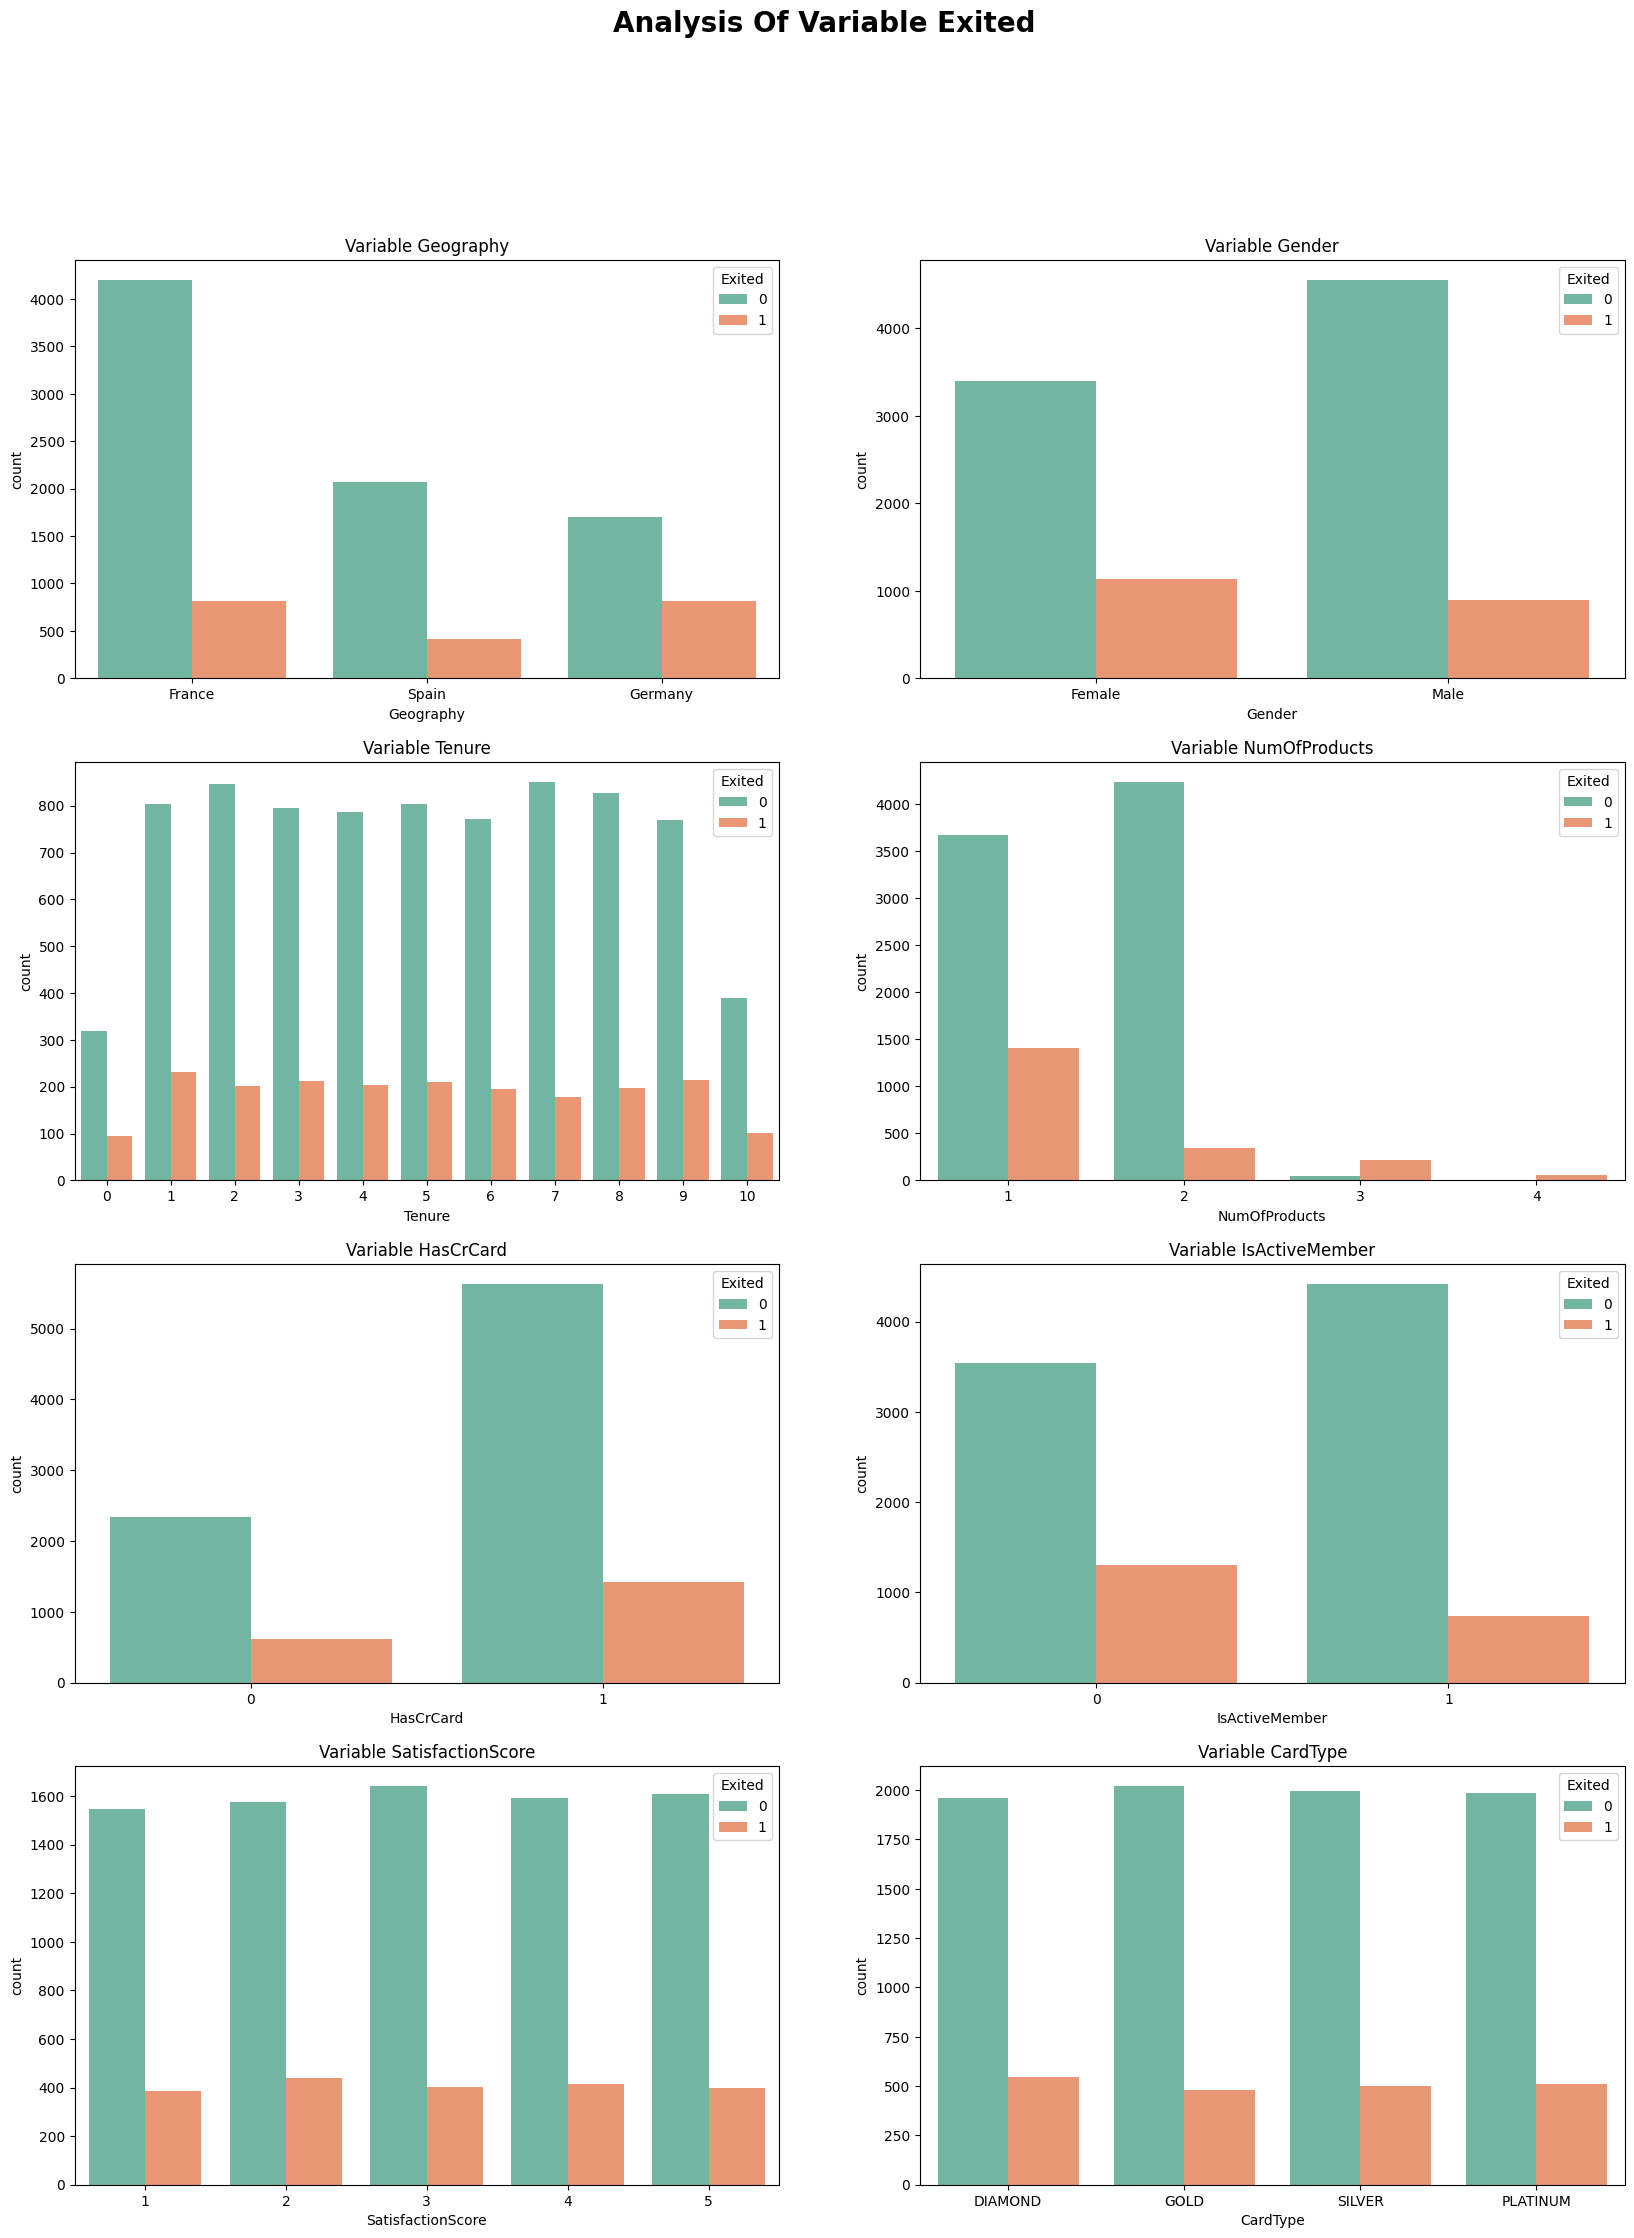

In [16]:
plt.figure(figsize = (20, 25))
plt.suptitle("Analysis Of Variable Exited",fontweight="bold", fontsize=20)

plt.subplot(4, 2, 1)
plt.gca().set_title('Variable Geography')
sns.countplot(x = 'Geography', hue = 'Exited', palette = 'Set2', data = churn)

plt.subplot(4, 2, 2)
plt.gca().set_title('Variable Gender')
sns.countplot(x = 'Gender', hue = 'Exited', palette = 'Set2', data = churn)

plt.subplot(4, 2, 3)
plt.gca().set_title('Variable Tenure')
sns.countplot(x = 'Tenure', hue = 'Exited', palette = 'Set2', data = churn)

plt.subplot(4, 2, 4)
plt.gca().set_title('Variable NumOfProducts')
sns.countplot(x = 'NumOfProducts', hue = 'Exited', palette = 'Set2', data = churn)

plt.subplot(4, 2, 5)
plt.gca().set_title('Variable HasCrCard')
sns.countplot(x = 'HasCrCard', hue = 'Exited', palette = 'Set2', data = churn)

plt.subplot(4, 2, 6)
plt.gca().set_title('Variable IsActiveMember')
sns.countplot(x = 'IsActiveMember', hue = 'Exited', palette = 'Set2', data = churn)

plt.subplot(4, 2, 7)
plt.gca().set_title('Variable SatisfactionScore')
sns.countplot(x = 'SatisfactionScore', hue = 'Exited', palette = 'Set2', data = churn)

plt.subplot(4, 2, 8)
plt.gca().set_title('Variable CardType')
sns.countplot(x = 'CardType', hue = 'Exited', palette = 'Set2', data = churn)

<AxesSubplot:xlabel='Exited', ylabel='PointEarned'>

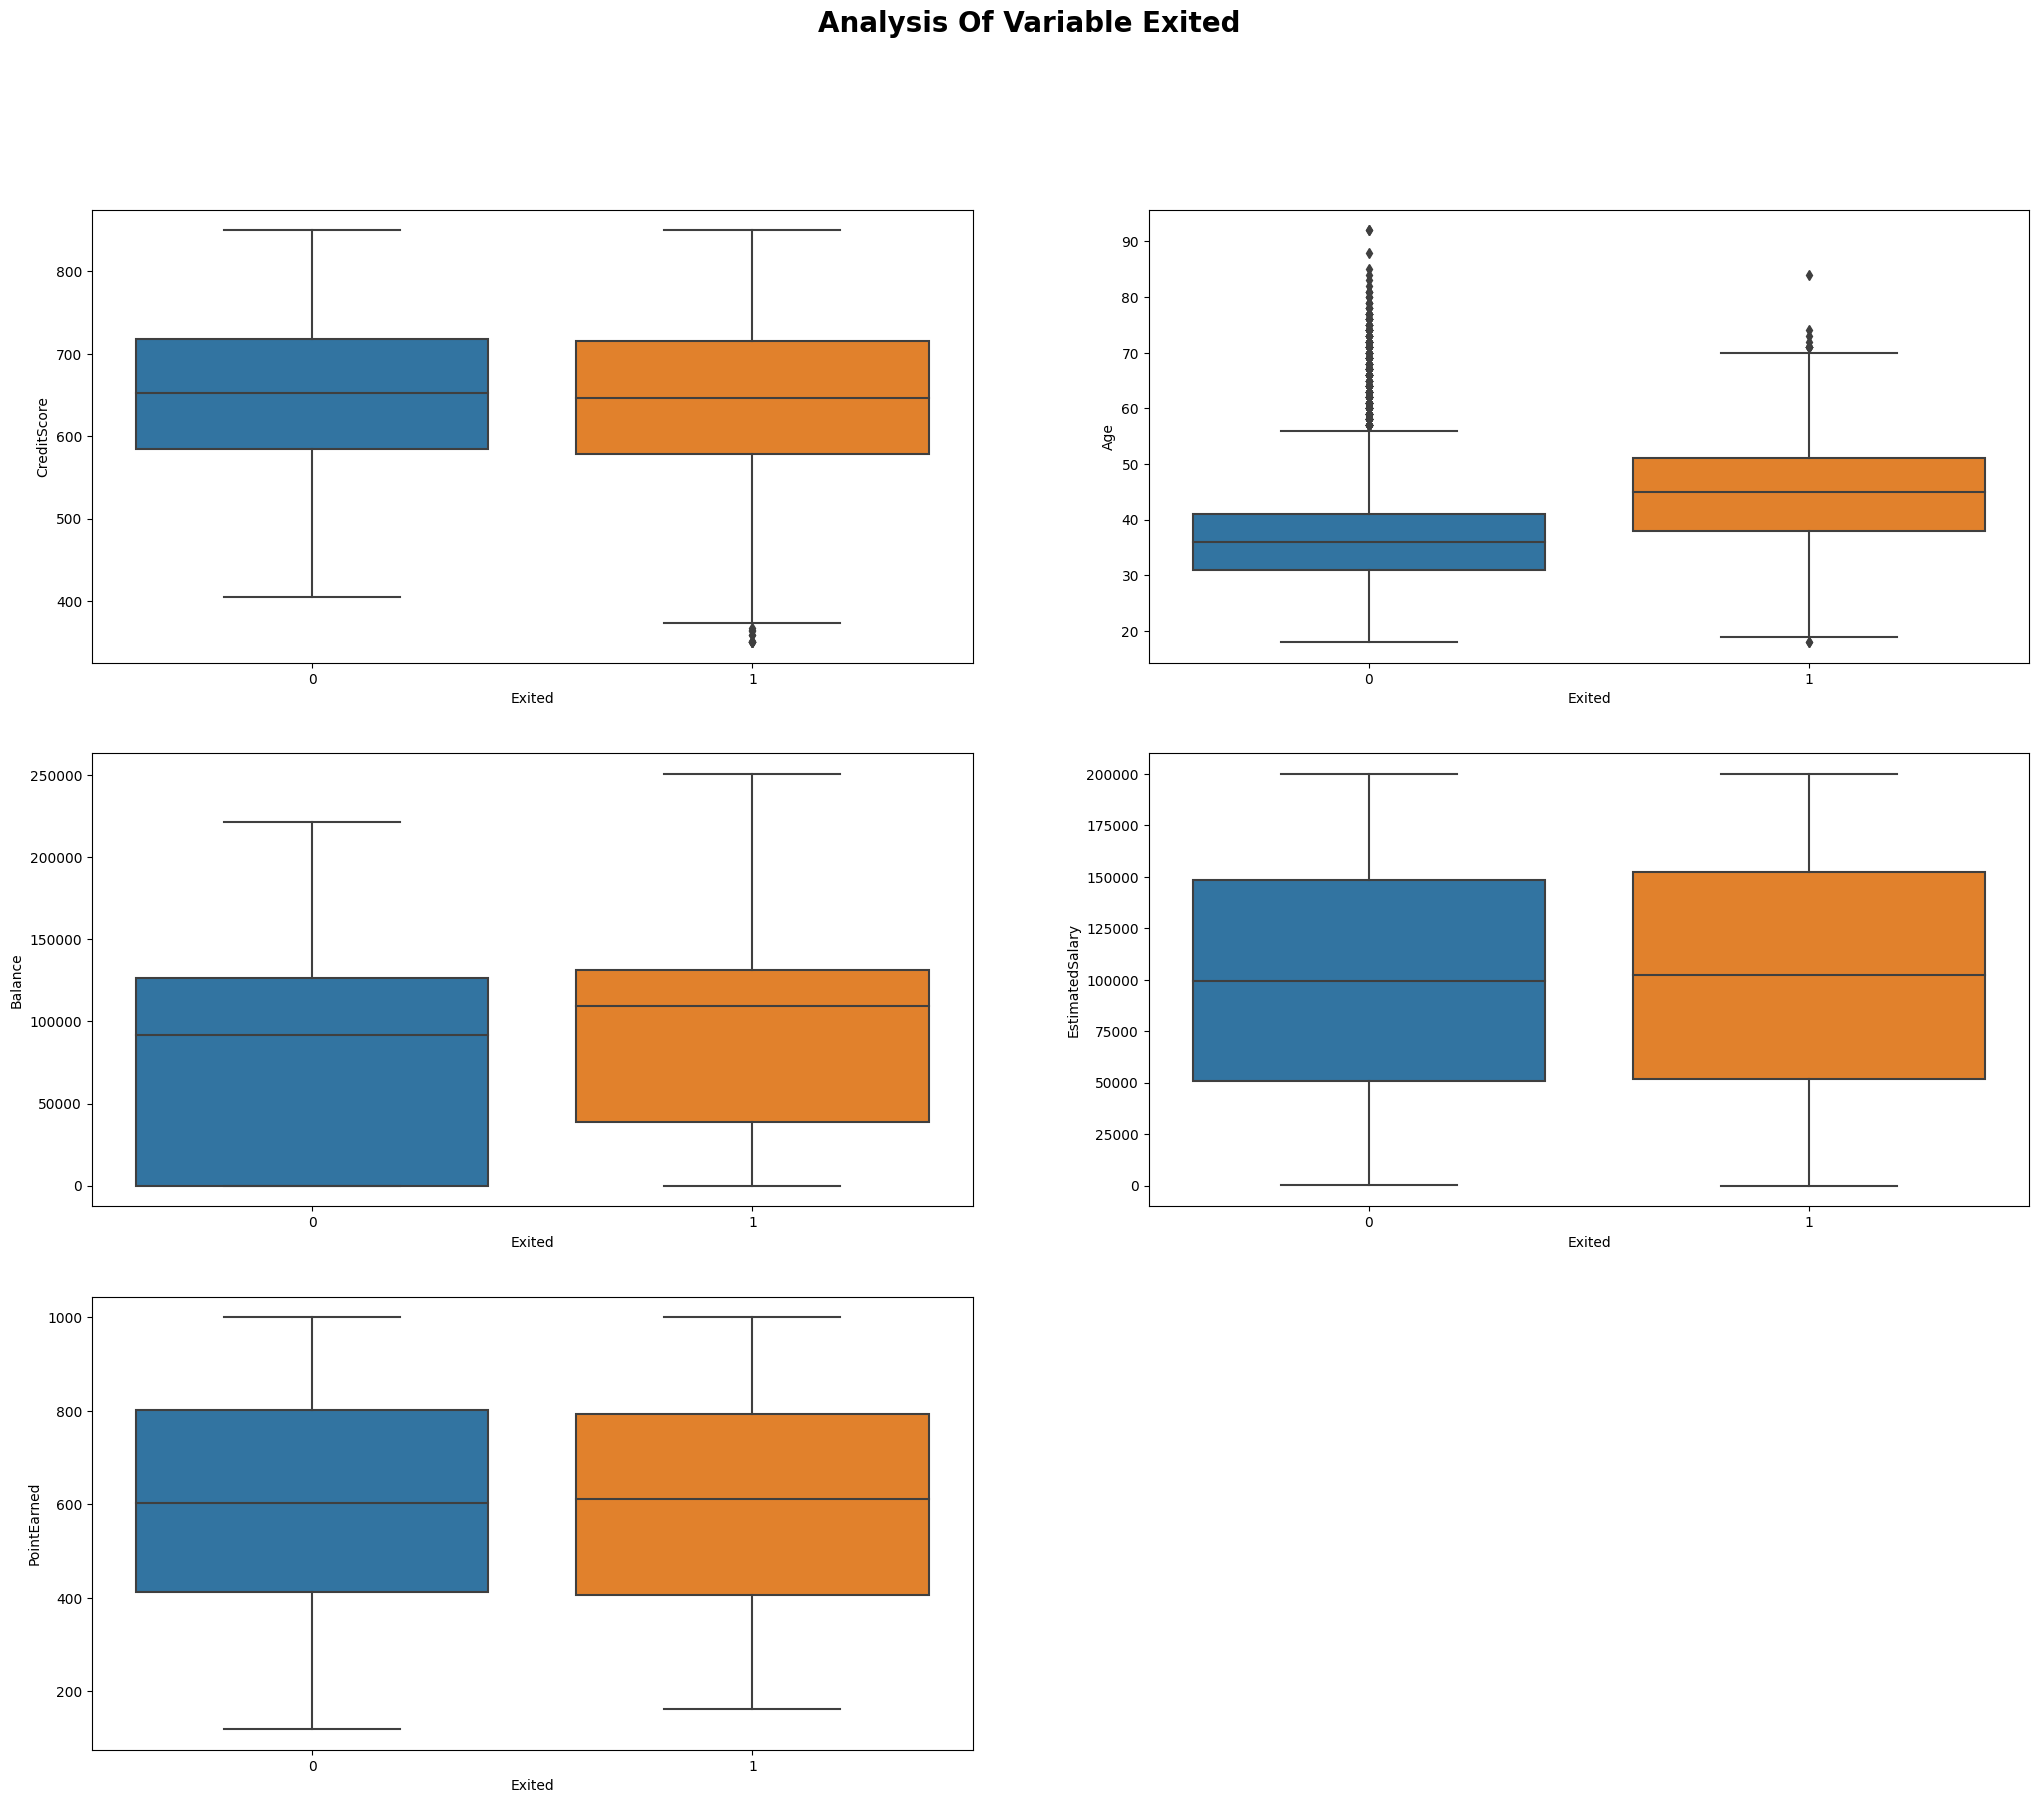

In [17]:
plt.figure(figsize = (25, 20))
plt.suptitle("Analysis Of Variable Exited",fontweight="bold", fontsize=20)

plt.subplot(3,2,1)
sns.boxplot(x="Exited", y="CreditScore", data=churn)

plt.subplot(3,2,2)
sns.boxplot(x="Exited", y="Age", data=churn)

plt.subplot(3,2,3)
sns.boxplot(x="Exited", y="Balance", data=churn)

plt.subplot(3,2,4)
sns.boxplot(x="Exited", y="EstimatedSalary", data=churn)

plt.subplot(3,2,5)
sns.boxplot(x="Exited", y="PointEarned", data=churn)

In [18]:
def classification_metrics(y_test,y_pred):
    print("Accuracy is: ", accuracy_score(y_test,y_pred))
    print("Precision is: ", precision_score(y_test,y_pred))
    print("Recall is: ", recall_score(y_test,y_pred))
    print("F1-Score is: ", f1_score(y_test,y_pred))

In [19]:
def roc_curve_plot(y_test,y_pred,y_train,y_pred_train):
    plt.figure(figsize=(5,5))
    fpr, tpr, thresholds = roc_curve(y_test ,y_pred)
    fpr1, tpr1, thresholds1 = roc_curve(y_train ,y_pred_train)
    plt.plot(fpr, tpr)
    plt.plot(fpr1, tpr1)
    plt.xlabel("fpr")
    plt.ylabel("tpr")
    plt.title("ROC Curve")
    plt.show()

### SVM Model kernel = "Linear"

In [20]:
x=churn[['Age','Balance','NumOfProducts']]
y=churn['Exited']

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [22]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 3)
(2000, 3)
(8000,)
(2000,)


In [23]:
model=SVC(kernel="rbf",  C=0.0001)

In [24]:
model.fit(x_train,y_train)

SVC(C=0.0001)

In [25]:
model.support_vectors_

array([[4.0000000e+01, 0.0000000e+00, 2.0000000e+00],
       [7.4000000e+01, 0.0000000e+00, 2.0000000e+00],
       [4.4000000e+01, 1.3344497e+05, 1.0000000e+00],
       ...,
       [2.0000000e+01, 1.1735619e+05, 1.0000000e+00],
       [3.8000000e+01, 0.0000000e+00, 3.0000000e+00],
       [4.3000000e+01, 1.9022746e+05, 1.0000000e+00]])

In [26]:
y_pred=model.predict(x_test)

In [27]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [28]:
y_test

6252    0
4684    0
1731    0
4742    0
4521    0
       ..
6412    1
8285    0
7853    1
1095    1
6929    1
Name: Exited, Length: 2000, dtype: int64

In [29]:
precision_score(y_test,y_pred)

C:\Users\USER\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [30]:
classification_metrics(y_test,y_pred)

Accuracy is:  0.8035
Precision is:  0.0
Recall is:  0.0
F1-Score is:  0.0


C:\Users\USER\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
y_train_test=model.predict(x_train)

In [32]:
y_train.mean()

0.205625

In [33]:
classification_metrics(y_train,y_train_test)

Accuracy is:  0.794375
Precision is:  0.0
Recall is:  0.0
F1-Score is:  0.0


C:\Users\USER\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
from sklearn.metrics import classification_report

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       0.00      0.00      0.00       393

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.80      0.72      2000



C:\Users\USER\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
confusion_matrix(y_test,y_pred)

array([[1607,    0],
       [ 393,    0]], dtype=int64)

# KNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier 

In [38]:
mod_knn=KNeighborsClassifier()  #K=5

In [39]:
x=churn[['Age','Balance','NumOfProducts','Geography']]
y=churn['Exited']

In [40]:
x

Age    Balance  NumOfProducts Geography
0      42       0.00              1    France
1      41   83807.86              1     Spain
2      42  159660.80              3    France
3      39       0.00              2    France
4      43  125510.82              1     Spain
...   ...        ...            ...       ...
9995   39       0.00              2    France
9996   35   57369.61              1    France
9997   36       0.00              1    France
9998   42   75075.31              2   Germany
9999   28  130142.79              1    France

[10000 rows x 4 columns]

In [41]:
mod_knn.fit(x_train,y_train)

KNeighborsClassifier()

In [42]:
y_knn_pred=mod_knn.predict(x_test)

In [43]:
y_knn_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [44]:
y_test

6252    0
4684    0
1731    0
4742    0
4521    0
       ..
6412    1
8285    0
7853    1
1095    1
6929    1
Name: Exited, Length: 2000, dtype: int64

In [45]:
classification_metrics(y_test,y_knn_pred)

Accuracy is:  0.7835
Precision is:  0.4029126213592233
Recall is:  0.21119592875318066
F1-Score is:  0.27712854757929883


In [46]:
parameters =  {'n_neighbors':[3,5,10,20,30]}
grid_mod_knn = GridSearchCV(mod_knn, parameters)
grid_mod_knn.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 10, 20, 30]})

In [47]:
grid_mod_knn.best_params_

{'n_neighbors': 20}

In [48]:
grid_mod_knn.best_score_

0.8022500000000001

In [49]:
confusion_matrix(y_test,y_knn_pred)

array([[1484,  123],
       [ 310,   83]], dtype=int64)

# Naive_Bayesian

In [50]:
model=GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [51]:
y_pred=model.predict(x_test)

In [52]:
classification_metrics(y_test,y_pred)

Accuracy is:  0.7895
Precision is:  0.32926829268292684
Recall is:  0.06870229007633588
F1-Score is:  0.1136842105263158


<AxesSubplot:>

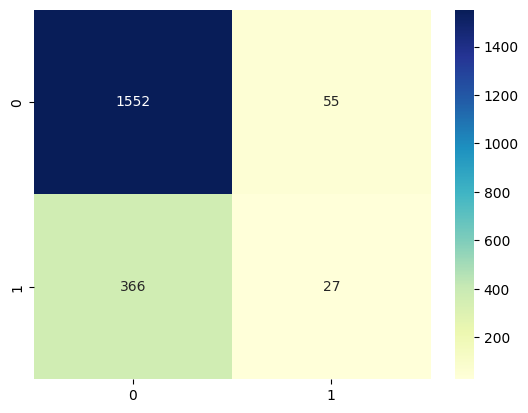

In [53]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d', cmap='YlGnBu')


In [54]:
y_pred_train=model.predict(x_train)


In [55]:
classification_metrics(y_train,y_pred_train)

Accuracy is:  0.77975
Precision is:  0.3264094955489614
Recall is:  0.0668693009118541
F1-Score is:  0.11099899091826437


# ROC

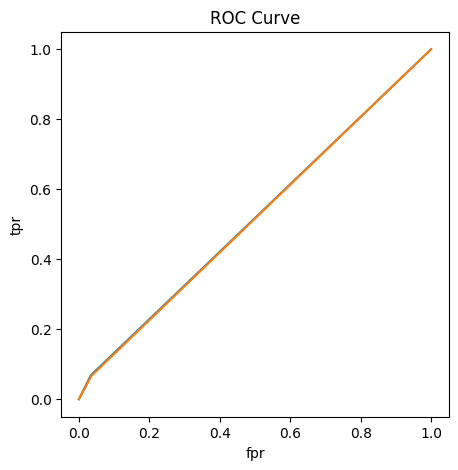

In [56]:
plt.figure(figsize=(5,5))
fpr, tpr, thresholds = roc_curve(y_test ,y_pred)
fpr1, tpr1, thresholds1 = roc_curve(y_train ,y_pred_train)
plt.plot(fpr, tpr)
plt.plot(fpr1, tpr1)
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ROC Curve")
plt.show()

# Decision Tree Model

In [57]:
model_dt=DecisionTreeClassifier()

In [58]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [59]:
y_pred_dt=model_dt.predict(x_test)

In [60]:
y_pred_dt

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [61]:
classification_metrics(y_test,y_pred_dt)

Accuracy is:  0.7885
Precision is:  0.4607329842931937
Recall is:  0.44783715012722647
F1-Score is:  0.45419354838709675


In [62]:
y_pred_dt_train=model_dt.predict(x_train)

In [63]:
classification_metrics(y_train,y_pred_dt_train)

Accuracy is:  0.968
Precision is:  0.9639278557114228
Recall is:  0.8772036474164133
F1-Score is:  0.9185232336091661


# ROC

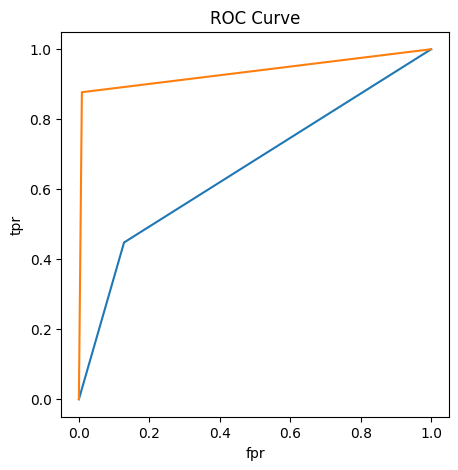

In [64]:
plt.figure(figsize=(5,5))
fpr, tpr, thresholds = roc_curve(y_test ,y_pred_dt)
fpr1, tpr1, thresholds1 = roc_curve(y_train ,y_pred_dt_train)
plt.plot(fpr, tpr)
plt.plot(fpr1, tpr1)
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ROC Curve")
plt.show()

# Overfitting

In [65]:
model_dt=DecisionTreeClassifier(max_depth=3)

In [66]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [67]:
y_pred_dt=model_dt.predict(x_test)

In [68]:
y_pred_dt

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [69]:
classification_metrics(y_test,y_pred_dt)

Accuracy is:  0.833
Precision is:  0.5870206489675516
Recall is:  0.5063613231552163
F1-Score is:  0.5437158469945355


In [70]:
y_pred_dt_train=model_dt.predict(x_train)

In [71]:
classification_metrics(y_train,y_pred_dt_train)

Accuracy is:  0.83
Precision is:  0.6053215077605322
Recall is:  0.4978723404255319
F1-Score is:  0.5463642428285523


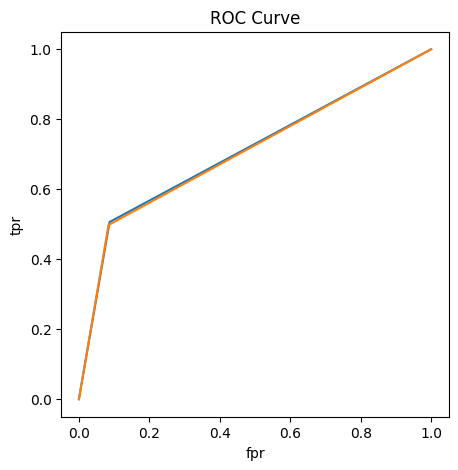

In [72]:
plt.figure(figsize=(5,5))
fpr, tpr, thresholds = roc_curve(y_test ,y_pred_dt)
fpr1, tpr1, thresholds1 = roc_curve(y_train ,y_pred_dt_train)
plt.plot(fpr, tpr)
plt.plot(fpr1, tpr1)
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ROC Curve")
plt.show()

<AxesSubplot:>

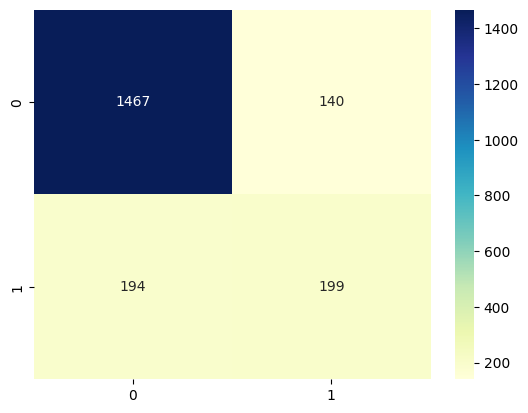

In [73]:
sns.heatmap(confusion_matrix(y_test,y_pred_dt), annot=True, fmt='d', cmap='YlGnBu')

# # Bagging Random Forest Model


In [74]:
RFmodel=RandomForestClassifier()

In [75]:
RFmodel.fit(x_train,y_train)

RandomForestClassifier()

In [76]:
x_train

Age    Balance  NumOfProducts
9254   32       0.00              2
1561   42  119624.60              2
1670   24  114739.92              1
6087   27  135637.00              1
6669   56  142147.32              1
...   ...        ...            ...
5734   54   69712.74              1
5191   58       0.00              1
5390   38       0.00              3
860    43  190227.46              1
7270   51  147910.30              1

[8000 rows x 3 columns]

In [77]:
y_predRF=RFmodel.predict(x_test)

In [78]:
classification_metrics(y_test,y_predRF)

Accuracy is:  0.8015
Precision is:  0.49441340782122906
Recall is:  0.45038167938931295
F1-Score is:  0.47137150466045274


In [79]:
y_predRF_train=RFmodel.predict(x_train)

In [80]:
classification_metrics(y_train,y_predRF_train)

Accuracy is:  0.967875
Precision is:  0.9626666666666667
Recall is:  0.8778115501519757
F1-Score is:  0.9182829888712243


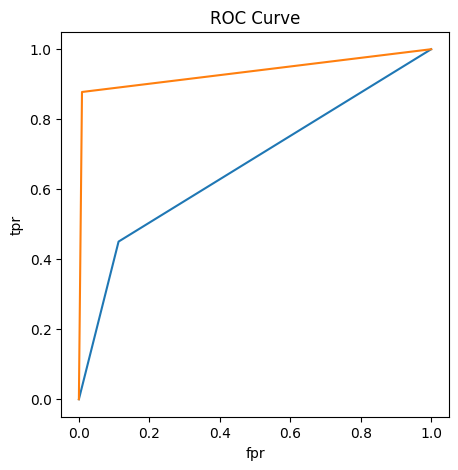

In [81]:
roc_curve_plot(y_test,y_predRF,y_train,y_predRF_train)

# Overfitting

In [82]:
RFmodel=RandomForestClassifier(max_depth=3)

In [83]:
RFmodel.fit(x_train,y_train)

RandomForestClassifier(max_depth=3)

In [84]:
y_predRF=RFmodel.predict(x_test)

In [85]:
classification_metrics(y_test,y_predRF)

Accuracy is:  0.825
Precision is:  0.8412698412698413
Recall is:  0.13486005089058525
F1-Score is:  0.2324561403508772


In [86]:
y_predRF_train=RFmodel.predict(x_train)

In [87]:
classification_metrics(y_train,y_predRF_train)

Accuracy is:  0.819125
Precision is:  0.9230769230769231
Recall is:  0.13130699088145897
F1-Score is:  0.2299095263437999


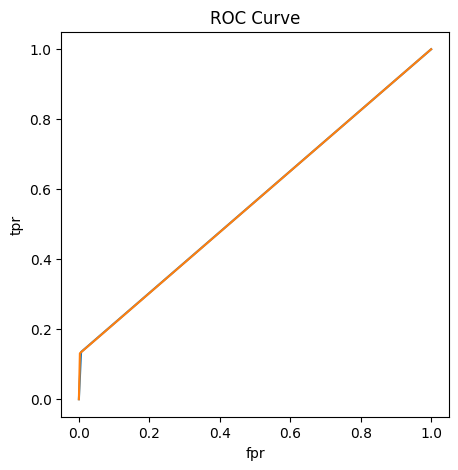

In [88]:
roc_curve_plot(y_test,y_predRF,y_train,y_predRF_train)

In [89]:
mod=RandomForestClassifier()
parameters=[{'max_depth':[3,5,7,10,12,15,16]}]
grid_model=RandomizedSearchCV(param_distributions=parameters,estimator=mod)

In [90]:
grid_model.fit(x_train,y_train)

C:\Users\USER\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 7 is smaller than n_iter=10. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions=[{'max_depth': [3, 5, 7, 10, 12, 15,
                                                       16]}])

In [91]:
grid_model.best_params_

{'max_depth': 10}

In [92]:
grid_model.best_score_

0.8408749999999999

# Adamodel

In [93]:
Adamodel=AdaBoostClassifier(n_estimators=1000)

In [94]:
Adamodel.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=1000)

In [95]:
y_predAda=Adamodel.predict(x_test)

In [96]:
classification_metrics(y_test,y_predAda)

Accuracy is:  0.841
Precision is:  0.6306620209059234
Recall is:  0.46055979643765904
F1-Score is:  0.5323529411764707


In [97]:
y_predAda_train=RFmodel.predict(x_train)

In [98]:
classification_metrics(y_train,y_predAda_train)

Accuracy is:  0.819125
Precision is:  0.9230769230769231
Recall is:  0.13130699088145897
F1-Score is:  0.2299095263437999


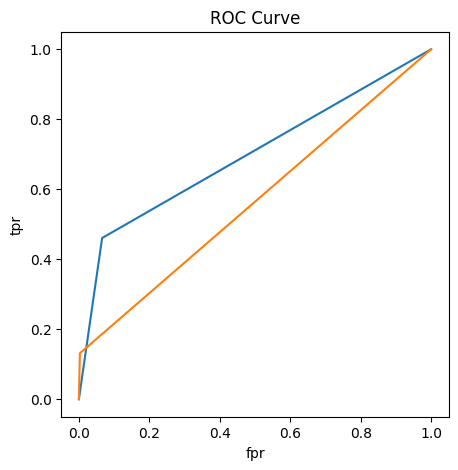

In [99]:
roc_curve_plot(y_test,y_predAda,y_train,y_predAda_train)

In [100]:
df_to_predict=pd.DataFrame([dict(zip(x_train.columns, [50,10000,3]))])

In [101]:
y_predRF_train=RFmodel.predict(df_to_predict)

In [102]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            10000 non-null  int64  
 1   Balance        10000 non-null  float64
 2   NumOfProducts  10000 non-null  int64  
 3   Geography      10000 non-null  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 312.6+ KB


In [103]:
y_predRF_train

array([1], dtype=int64)